<h3 align=center>Final Tutorial - Relationship and Impacts of COVID on the Movie Industry</h3>
<h4 align=center>Venkat Gokaraju, Sean Tan, Tony Chen, Jahanzeb Hassan</h4>

-- Insert Brief Intro/Explanation Here --


-- Start with imports --

In [40]:
import sqlite3 as sql, pandas as pd, numpy as np, matplotlib as mpl, matplotlib.pyplot as pyplot, math
from matplotlib.ticker import FormatStrFormatter

-- Pulling movie data from DB --

In [41]:
movieDB = 'movie.db'
conn = sql.connect(movieDB)

#Queries movie.db for movie title, release date, popularity, vote average, vote count, revenue, and budget
sql_query = ''' \
    SELECT movies.title, movies.release_date, movies.popularity, movies.vote_average, movies.vote_count, movies.revenue, movies.budget
    FROM movies
'''

moviesDF = pd.read_sql(sql_query, conn)
moviesDF


,title,release_date,popularity,vote_average,vote_count,revenue,budget
0,Bad Boys for Life,2020-01-17,73.253,7.2,6645,426505244,90000000
1,Super Troopers 2,2018-04-20,12.451,5.8,322,18850674,13500000
2,Pet Sematary,2019-04-05,24.863,5.7,2559,112399944,21000000
3,How to Train Your Dragon: The Hidden World,2019-02-22,61.609,7.8,4810,517526875,129000000
4,Star Wars: The Rise of Skywalker,2019-12-20,62.079,6.5,7223,1074144248,250000000
...,...,...,...,...,...,...,...
1925,Black Island,2021-08-18,89.923,6.2,111,0,0
1926,Jurassic Hunt,2021-08-24,293.261,5.0,155,0,0
1927,Schumacher,2021-09-15,28.985,7.4,187,0,0
1928,Hypnotic,2021-10-27,349.019,6.2,248,0,0


-- Basic Analysis of Movie dataset on it's own, identifying general trends --

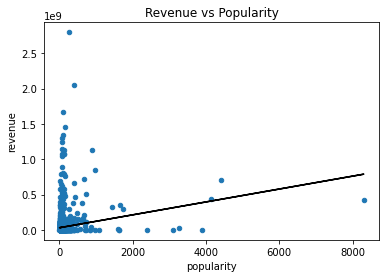

In [42]:
# Plot popularity against revenue
ax1 = moviesDF.plot.scatter(x='popularity', y='revenue')
ax1.set_title("Revenue vs Popularity")

# Linear regression on popularity and revenue
popularityCol = moviesDF.loc[:, 'popularity']
revenueCol = moviesDF.loc[:, 'revenue']

m, b = np.polyfit(popularityCol, revenueCol, deg=1)

# Plot regression line
ax1.plot(popularityCol, m*popularityCol + b, color="black")

-- Pulling COVID dataset, talk about source of data, etc etc --

In [43]:
# Reads covid19 worldwide cases csv file
cases_COVID = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
deaths_COVID = pd.read_csv("COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv")

# Aggregating data as we will focus on just aggregate information by date
cases_COVID.drop(columns=['Province/State','Country/Region', 'Lat', 'Long'], inplace=True)
deaths_COVID.drop(columns=['Province/State','Country/Region', 'Lat', 'Long'], inplace=True)

cases_COVID_agg = cases_COVID.sum(axis=0)
deaths_COVID_agg = deaths_COVID.sum(axis=0)

covid_DF = pd.concat([cases_COVID_agg, deaths_COVID_agg], axis=1)
covid_DF.columns = ['Confirmed Cases To Date', 'Deaths To Date']
covid_DF

,Confirmed Cases To Date,Deaths To Date
1/22/20,557,17
1/23/20,655,18
1/24/20,941,26
1/25/20,1434,42
1/26/20,2118,56
...,...,...
12/9/21,268558598,5287902
12/10/21,269250556,5296051
12/11/21,269739121,5301760
12/12/21,270159882,5306078


-- Regression Analysis --